- 訓練資料與測試資料必須分開標準化
- 上述程式碼將測試資料規劃為 30%

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Read data
df = pd.read_excel('Wine.xlsx')
X = np.array(df.iloc[:, :-1]) # 排 除 最 後 一 欄 標 籤
y = np.array(df.iloc[:, -1])
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2)
# Standardize data
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)



142

- Logictic regression

In [29]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_original = LogisticRegression(solver = solver, **opts)
clf_original.fit(X_train_, y_train) #input data must be (n_sample, )
y_pred = clf_original.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print(f"{clf_original.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

94.44%

94.44%

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



<font color=skyblue>最佳組合選擇 by GridSearchCV</font>：

CV: Cross Validation

In [10]:
from sklearn.model_selection import  GridSearchCV, \
                        StratifiedShuffleSplit

from datetime import datetime
df = pd.read_excel('Wine.xlsx')
# Get the current date and time
now = datetime.now()
# Format the date and time as a string
now_str = now.strftime("%Y_%m_%d_%H_%M_%S")
results_file = 'df' + now_str + '.csv'

opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for LogisticRegression
parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg','sag','saga'], 
              'C':[0.1, 1, 10]} # parameters for GridSearchCV

# parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg',\
#                         'sag','saga']}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, \
                            random_state=0) # 5-fold CV
grid = GridSearchCV(estimator=LogisticRegression(**opts), \
                param_grid=parameters, cv=cv, 
                scoring=['accuracy','f1_macro'], refit="accuracy")
grid.fit(X_train, y_train)
# grid.fit(X, y)
cv_logistic = pd.DataFrame(data = grid.cv_results_)
cv_logistic.to_csv(results_file)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

d:\python_venv\ml_evnv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python_venv\ml_evnv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

{'C': 0.1, 'solver': 'liblinear'}
0.9736842105263157
LogisticRegression(C=0.1, max_iter=1000000, solver='liblinear', tol=1e-06)


In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_PCA = LogisticRegression(solver = solver, **opts)
clf_PCA.fit(Z_train, y_train)
y_pred = clf_PCA.predict(Z_test)
print(f"{clf_PCA.score(Z_test, y_test):.2%}\n")

83.33%



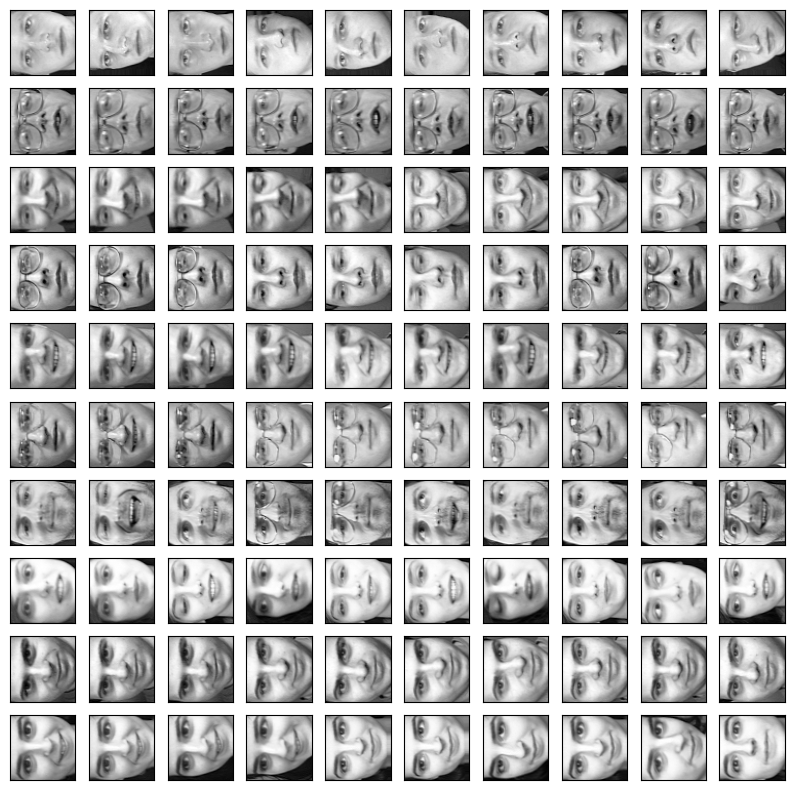

In [11]:
import matplotlib.pyplot as plt

def show_montage(X, n, m, h, w):
    #X: 影 像 資 料 矩 陣 ， 每 行 代 表 一 張 影 像
    #n, m: 每 張 影 像 的 大 小 n x m
    #h, w : 建 立 一 個 蒙 太 奇 圖 陣 ， 大小 figsize = (w,h)

    fig, axes = plt.subplots(h, w, figsize=(w, h))
    if X.shape[1] < w * h: # 影 像 張 數 不 到 w x h 張 ， 用 0 向量補齊
        X = np.c_[X, np.zeros((X.shape[0], w*h-X.shape[1]))]
    for i, ax in enumerate(axes.flat):
        ax.imshow(X[:,i].reshape(m, n).T, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

df = pd.read_csv('face_data.csv')
n_persons = df['target'].nunique()
X = np.array(df.drop('target', axis = 1)) #400*4096
y = np.array(df['target'])
n, m = 64, 64
show_montage(X.T, n, m, 10, 10)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os

D = scipy.io.loadmat('allFaces.mat')
X = D['faces'].T # 32256 x 2410, each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = D['m'].item() # 168
n = D['n'].item() # 192
n_persons = D['person'].item() # 38

y_labels = np.repeat(np.arange(len(y)), y)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=True)
#solver = 'lbfgs' # ’lbfgs’ is the default
# solver = ’liblinear’
# solver = ’newton−cg’
clf_LR = LogisticRegression(solver = 'lbfgs', **opts)
clf_LR.fit(X_train_, y_train)
y_pred = clf_LR.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f"{clf_LR.score(X_test_, y_test):.2%}\n")
print(classification_report(y_test, y_pred))

94.44%

              precision    recall  f1-score   support

           1       1.00      0.88      0.94        17
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00         9

    accuracy                           0.94        36
   macro avg       0.94      0.96      0.95        36
weighted avg       0.95      0.94      0.95        36



神經網絡: